In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('original.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dff = pd.read_csv('filtered.csv')
dff.head()

,battery_power,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,three_g,sc_w,price_range
0,842,1,7,188,2,20,756,2549,0,7,1
1,1021,0,53,136,6,905,1988,2631,1,3,2
2,563,2,41,145,6,1263,1716,2603,1,2,2
3,615,0,10,131,9,1216,1786,2769,1,8,2
4,1821,13,44,141,14,1208,1212,1411,1,2,1


In [4]:
dtParams = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
rfParams = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],}
svmParams = {'C': [0.1, 1, 10, 100, 1000],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': [0.1, 1, 10, 100, 1000]}

## Original Dataset

In [5]:
# For original model
MODEL = []
TEST = []
TRAIN = []
def eval(model,test,train):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))

In [6]:
x = df.drop('price_range', axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1386, 20), (594, 20), (1386,), (594,))

## Filtered Dataset

In [7]:
# For filtered model
MODEL = []
TEST = []
TRAIN = []
def eval(model,test,train):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))

In [8]:
x = dff.drop('price_range', axis=1)
y = dff['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1386, 10), (594, 10), (1386,), (594,))

In [9]:
grid =  GridSearchCV(DecisionTreeClassifier(), dtParams, cv=5, verbose = 1, n_jobs = -1, scoring='accuracy')
grid.fit(x_train, y_train)
grid.best_params_, grid.best_score_

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


({'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6},
 0.8383944108251307)

In [10]:
dtBest = grid.best_estimator_
dtBest.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6)

In [11]:
y_dt = dtBest.predict(x_test)
pd.DataFrame(np.c_[y_test, y_dt], columns=['Actual', 'Predicted']).head()

,Actual,Predicted
0,3,3
1,0,0
2,0,0
3,3,3
4,1,1


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       158
           1       0.86      0.83      0.84       155
           2       0.78      0.83      0.80       129
           3       0.94      0.87      0.90       152

    accuracy                           0.87       594
   macro avg       0.87      0.87      0.87       594
weighted avg       0.87      0.87      0.87       594



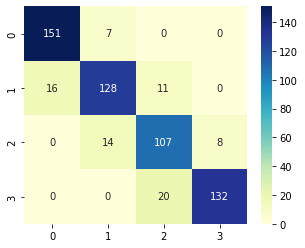

In [12]:
dtTrain = dtBest.score(x_train, y_train)*100
dtTest = dtBest.score(x_test, y_test)*100
dtCon = confusion_matrix(y_test, y_dt)
print(classification_report(y_test, y_dt))
plt.figure(figsize=(5,4))
sns.heatmap(dtCon, annot=True, fmt='g', cmap='YlGnBu')
eval('Decision Tree',dtTest,dtTrain)


In [13]:
result = pd.DataFrame({'Model': MODEL, 'Test Accuracy': TEST, 'Train Accuracy': TRAIN})
result.sort_values(by='Test Accuracy', ascending=False)

,Model,Test Accuracy,Train Accuracy
0,Decision Tree,87.21,95.31


In [14]:
# grid =  GridSearchCV(SVC(), svmParams, cv=5, scoring='accuracy')
# grid.fit(x_train, y_train)
# grid.best_params_, grid.best_score_

# grid =  GridSearchCV(RandomForestClassifier(), rfParams, cv=5, scoring='accuracy')
# grid.fit(x_train, y_train)
# grid.best_params_, grid.best_score_

# grid =  GridSearchCV(DecisionTreeClassifier(), dtParams, cv=5, scoring='accuracy')
# grid.fit(x_train, y_train)
# grid.best_params_, grid.best_score_